# Importing Dependencies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import tensorflow as tf

# Preparing Training datasets

[1 0 1 ... 7 6 9]
(42000, 28, 28)


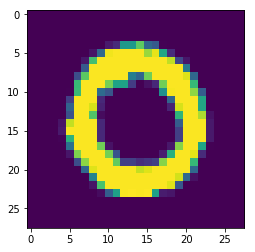

(42000, 784)
(42000, 28, 28)


In [2]:
data=pd.read_csv("./train.csv")
data_y=data["label"]
data_y=np.array(data_y)
# data_y=np.reshape(data_y,(42000,1))
print(data_y)


data_X=data.drop(columns=['label'])
data_X=np.array(data_X)


display=np.reshape(data_X,(42000,28,28))
print(display.shape)
plt.imshow(display[1,:,:])
plt.show()
print(data_X.shape)
print(display.shape)

# preparing Test set data

In [3]:
test_X=pd.read_csv("./test.csv")
test_X=np.array(test_X)
test_X.shape

(28000, 784)

# Displaying random 10 images

c:\users\ak\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


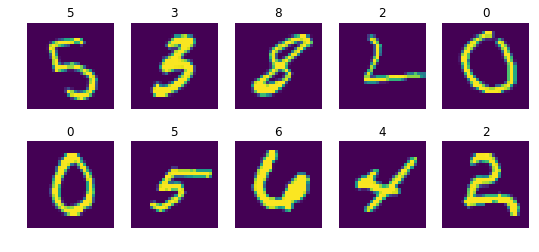

In [4]:
cols=5
rows=2
fig=plt.figure(figsize=(2*cols-1,2.5*rows-1))
for i in range(cols):
    for j in range(rows):
        random_index=np.random.randint(0,len(data_y))
        ax=fig.add_subplot(rows,cols,i*rows+j+1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(display[random_index,:])
        ax.set_title(data_y[random_index])
plt.show()

# converting label data_y in onehot matrix

In [5]:
data_y=tf.one_hot(indices=data_y,depth=10,axis=1)

In [6]:
with tf.Session() as sess:
    data_y=sess.run(data_y)

# Creating mini_batches

In [7]:
def mini_batches(batch_size,seed):
    np.random.seed(seed)
    batch_list=[]
    no_of_batches=int(data_X.shape[0]/batch_size)
    permutation=list(np.random.permutation(data_X.shape[0]))
    X_suffled=data_X[permutation,:]
    Y_suffled=data_y[permutation,:]
    for i in range(no_of_batches):
        mini_batches_X=X_suffled[i*batch_size:(i+1)*batch_size,:]
        mini_batches_Y=Y_suffled[i*batch_size:(i+1)*batch_size,:]
        batch=(mini_batches_X,mini_batches_Y)
        batch_list.append(batch)
    if data_X.shape[0]%no_of_batches!=0:
        mini_batches_X=X_suffled[i*batch_size:(i+1)*batch_size,:]
        mini_batches_Y=Y_suffled[i*batch_size:(i+1)*batch_size,:]
        batch=(mini_batches_X,mini_batches_Y)
        batch_list.append(batch)
    return batch_list


# creating placeholder and defining the layers 

In [8]:
tf.reset_default_graph()

In [9]:
X=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

In [10]:
A1=tf.layers.dense(X,256,activation=tf.nn.relu)
A2=tf.layers.dense(A1,64,activation=tf.nn.relu)
A3=tf.layers.dense(A2,30,activation=tf.nn.relu)
A4=tf.layers.dense(A3,10,activation=None)
probs=tf.nn.softmax(A4)
classes=tf.argmax(probs,axis=1)

In [11]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=A4,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# using AdamOptizer which is the combination of RMS prop and Momentum for faster optimization

In [12]:
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)

In [13]:
init=tf.global_variables_initializer()

# Creating Session to run the tensorflow model

In [14]:
sess=tf.Session()
sess.run(init)

# Training the data using tensorflow model

In [15]:
seed=0
num_epoches=40
batch_size=64
for epoch in range(num_epoches):
    batch_losses=[]
    batches=mini_batches(batch_size,seed)
    seed=seed+1
    for batch in batches:
        mini_X,mini_y=batch
        _,error_cost=sess.run([optimizer,cost],feed_dict={X:mini_X,y:mini_y})
        batch_losses.append(error_cost)
    correct_prediction=tf.equal(tf.argmax(A4,1),tf.argmax(data_y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))
    print("accuracy: ",accuracy.eval({X:data_X,y:data_y},session=sess))
    train_loss=np.mean(batch_losses)
    print(train_loss)
        

accuracy:  0.85316664
1.5198551
accuracy:  0.91045237
0.4695527
accuracy:  0.945
0.29187357
accuracy:  0.94090474
0.20407517
accuracy:  0.9705476
0.15309002
accuracy:  0.97578573
0.1256419
accuracy:  0.97885716
0.10713565
accuracy:  0.9676667
0.09478562
accuracy:  0.98564285
0.08294137
accuracy:  0.9821905
0.071579926
accuracy:  0.98761904
0.068069264
accuracy:  0.9847381
0.05860807
accuracy:  0.98111904
0.054504205
accuracy:  0.9898095
0.048123103
accuracy:  0.988619
0.053291976
accuracy:  0.98971426
0.048441377
accuracy:  0.9912381
0.04199324
accuracy:  0.9920238
0.035645593
accuracy:  0.98795235
0.03786062
accuracy:  0.9914524
0.03626028
accuracy:  0.9942381
0.031932123
accuracy:  0.9931667
0.030418985
accuracy:  0.99509525
0.033210088
accuracy:  0.9888333
0.0275069
accuracy:  0.99430954
0.028802514
accuracy:  0.989
0.019917937
accuracy:  0.9929048
0.028581463
accuracy:  0.9892857
0.0267306
accuracy:  0.99414283
0.030122783
accuracy:  0.9942857
0.01902798
accuracy:  0.9917857
0.0273

# Testing list of the data and displaying the results


c:\users\ak\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


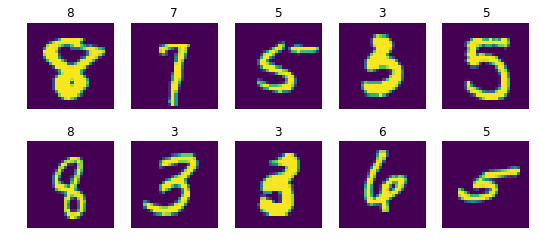

In [16]:
cols=5
rows=2
fig=plt.figure(figsize=(2*cols-1,2.5*rows-1))
for i in range(cols):
    for j in range(rows):
        random_index=np.random.randint(0,28000)
        ax=fig.add_subplot(rows,cols,i*rows+j+1)
        ax.grid('off')
        ax.axis('off')
        display=np.reshape(test_X,(28000,28,28))
        ax.imshow(display[random_index,:])
        prediction=tf.argmax(A4,1)
        prediction=prediction.eval({X:test_X},session=sess)
        ax.set_title(prediction[random_index])
plt.show()

